In [1]:
import pandas as pd
import numpy as np
import pyodbc


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [93]:
data_set = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/wmhor/OneDrive - De Haagse Hogeschool/DEDS/week 10/go_sales_schoon.accdb')
data_set2 = data_set

In [94]:
data_set = pd.read_sql("SELECT * FROM Query2", data_set)
data_set
data_set2 = pd.read_sql("SELECT * FROM Query3", data_set2)
data_set2


,RETURN_REASON_CODE
0,5
1,4
2,5
3,4
4,2
...,...
699,4
700,3
701,4
702,2


In [102]:
tree1 = DecisionTreeClassifier(max_depth = 8)

In [103]:
X = data_set.copy()
y = data_set2['RETURN_REASON_CODE']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.60, random_state = 100)
tree1 = tree1.fit(X_train, y_train)

In [92]:
X_test

,PRODUCT_NUMBER,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE,QUANTITY,RETURN_QUANTITY,ORDER_METHOD_CODE
412,11,2,1,16,2,7
492,9,1,1,54,4,7
333,71,11,3,18,18,5
272,82,14,3,40,40,5
248,16,2,1,178,12,2
...,...,...,...,...,...,...
80,73,12,3,34,2,7
694,25,4,1,40,2,4
469,71,11,3,26,26,7
611,41,5,1,26,2,7


In [67]:
tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [104]:
voorspelling = tree1.predict(X_test)
voorspelling

array(['4', '2', '1', '2', '2', '1', '1', '4', '5', '2', '2', '2', '1',
       '5', '2', '5', '2', '3', '2', '2', '2', '1', '2', '2', '2', '1',
       '1', '1', '1', '3', '2', '1', '2', '3', '1', '1', '2', '2', '1',
       '1', '1', '2', '2', '2', '5', '1', '2', '2', '2', '1', '2', '1',
       '2', '1', '2', '1', '2', '1', '2', '1', '1', '1', '2', '2', '1',
       '2', '2', '5', '1', '2', '2', '2', '2', '1', '2', '1', '2', '2',
       '2', '2', '1', '1', '1', '2', '1', '1', '1', '1', '2', '4', '1',
       '2', '3', '2', '2', '2', '2', '2', '1', '1', '3', '4', '2', '1',
       '1', '2', '1', '2', '1', '2', '2', '2', '2', '1', '1', '2', '2',
       '2', '1', '2', '5', '2', '2', '2', '2', '1', '2', '1', '5', '1',
       '5', '2', '2', '1', '1', '2', '1', '2', '1', '2', '2', '1', '1',
       '2', '1', '1', '1', '3', '2', '2', '1', '3', '2', '2', '2', '2',
       '1', '2', '2', '3', '2', '2', '1', '2', '2', '2', '2', '3', '2',
       '1', '1', '1', '2', '1', '1', '4', '2', '2', '1', '2', '1

In [105]:
proba = tree1.predict_proba(X_test)
proba

array([[0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ],
       [0.35897436, 0.35897436, 0.12820513, 0.05128205, 0.1025641 ],
       ...,
       [0.35897436, 0.35897436, 0.12820513, 0.05128205, 0.1025641 ],
       [0.26470588, 0.32352941, 0.05882353, 0.14705882, 0.20588235],
       [0.26470588, 0.32352941, 0.05882353, 0.14705882, 0.20588235]])

In [106]:
score = accuracy_score(y_test,voorspelling)
score

0.27423167848699764

In [107]:
confusion_matrix(y_test, voorspelling)

array([[57, 86,  5,  2,  5],
       [49, 54,  6,  1,  6],
       [16, 22,  3,  0,  1],
       [10, 19,  1,  1,  1],
       [34, 33,  8,  2,  1]], dtype=int64)

[Text(0.37801204819277107, 0.9444444444444444, 'x[0] <= 11.5\ngini = 0.751\nsamples = 281\nvalue = [87, 92, 28, 29, 45]'),
 Text(0.18373493975903615, 0.8333333333333334, 'x[0] <= 8.5\ngini = 0.722\nsamples = 39\nvalue = [6, 17, 8, 5, 3]'),
 Text(0.12650602409638553, 0.7222222222222222, 'x[3] <= 4.5\ngini = 0.663\nsamples = 29\nvalue = [5, 15, 5, 2, 2]'),
 Text(0.060240963855421686, 0.6111111111111112, 'x[0] <= 1.5\ngini = 0.659\nsamples = 19\nvalue = [4, 9, 5, 1, 0]'),
 Text(0.03614457831325301, 0.5, 'x[3] <= 3.5\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 0, 1, 0]'),
 Text(0.024096385542168676, 0.3888888888888889, 'x[3] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1, 0]'),
 Text(0.012048192771084338, 0.2777777777777778, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0]'),
 Text(0.03614457831325301, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.04819277108433735, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.0

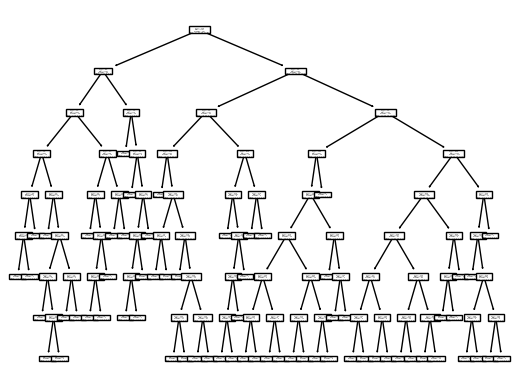

In [108]:
tree.plot_tree(tree1)